In [1]:
# https://pangeo-data.github.io/pangeo-cmip6-cloud/accessing_data.html
import gcsfs
import xarray as xr

# Connect to Google Cloud Storage
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper("gs://cmip6/CMIP6/CMIP/AS-RCEC/TaiESM1/1pctCO2/r1i1p1f1/Amon/hfls/gn/v20200225/")

# make sure to specify that metadata is consolidated
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (time: 1800, lat: 192, lon: 288, bnds: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1800, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    hfls       (time, lat, lon) float32 dask.array<chunksize=(292, 192, 288), meta=np.ndarray>
Attributes: (12/53)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0701-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     182500.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    tracking_id:               hdl:21.14100/813dbc9a-249f-4cde-a56c-fea0a42a5eb5
    variable_id:               hfls
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/813dbc9a-249f-4cde-a56c-fea0a42a5eb5
    version_id:                v20200225

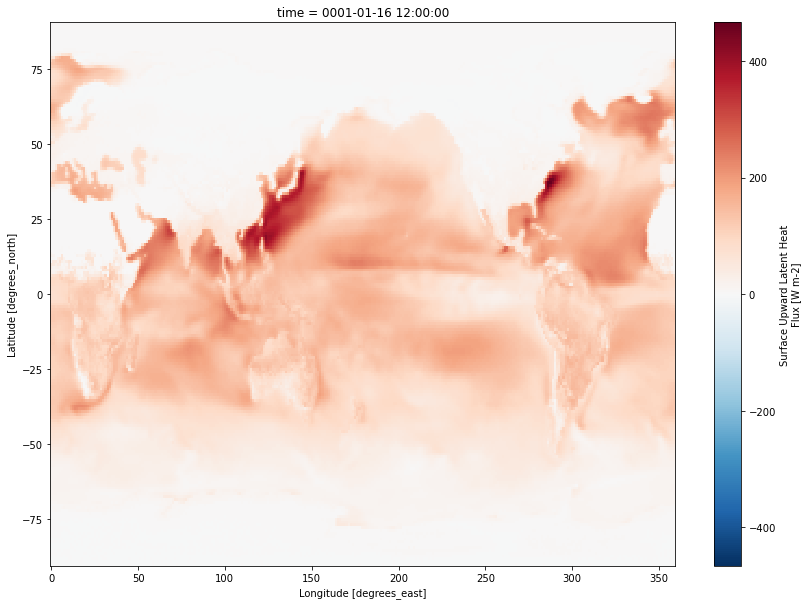

In [2]:
import cftime
t = cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)

ds.sel(time=t)['hfls'].plot(figsize=(14,10));

In [3]:
import pandas as pd

# for Google Cloud:
df = pd.read_csv("https://cmip6.storage.googleapis.com/pangeo-cmip6.csv")
# for AWS S3:
# df = pd.read_csv("https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.csv")

df_subset = df.query("activity_id=='CMIP' & table_id=='Amon' & variable_id=='tas'")
df_subset

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
695,CMIP,CNRM-CERFACS,CNRM-CM6-1,1pctCO2,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/...,NaN,20180626
967,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1313,CMIP,NOAA-GFDL,GFDL-ESM4,esm-piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
1533,CMIP,NOAA-GFDL,GFDL-ESM4,abrupt-4xCO2,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/abru...,NaN,20180701
1760,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
...,...,...,...,...,...,...,...,...,...,...,...
514461,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
514888,CMIP,MOHC,HadGEM3-GC31-LL,piControl,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/piC...,NaN,20211103
514899,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
514908,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


In [4]:
df.sample(10)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
434173,CMIP,MIROC,MIROC6,historical,r46i1p1f1,Amon,hus,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20200519
243059,ScenarioMIP,MOHC,UKESM1-0-LL,ssp245,r3i1p1f2,AERmon,rsutaf,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20190801
186154,DCPP,CCCma,CanESM5,dcppA-hindcast,r19i1p2f1,Omon,sos,gn,gs://cmip6/DCPP/CCCma/CanESM5/dcppA-hindcast/s...,1991.0,20190429
460896,CMIP,MIROC,MIROC-ES2L,historical,r9i1p1f2,Amon,tauu,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/histori...,NaN,20200903
161424,DCPP,CCCma,CanESM5,dcppA-hindcast,r1i1p2f1,Amon,ta,gn,gs://cmip6/DCPP/CCCma/CanESM5/dcppA-hindcast/s...,2004.0,20190429
428616,ScenarioMIP,EC-Earth-Consortium,EC-Earth3,ssp119,r139i1p1f1,Amon,tasmin,gr,gs://cmip6/CMIP6/ScenarioMIP/EC-Earth-Consorti...,NaN,20200412
129134,DAMIP,CCCma,CanESM5,hist-sol,r1i1p2f1,Amon,prw,gn,gs://cmip6/CMIP6/DAMIP/CCCma/CanESM5/hist-sol/...,NaN,20190429
436593,CMIP,MIROC,MIROC6,historical,r44i1p1f1,Amon,tauu,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,NaN,20200519
492765,CMIP,EC-Earth-Consortium,EC-Earth3-AerChem,historical,r4i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20201214
141250,PAMIP,CCCma,CanESM5,futSST-pdSIC,r94i1p2f1,Amon,rsdt,gn,gs://cmip6/CMIP6/PAMIP/CCCma/CanESM5/futSST-pd...,NaN,20190429


In [9]:
set(df['grid_label'])

{'gm', 'gn', 'gnz', 'gr', 'gr1', 'gr1z', 'gr2', 'gr2z', 'gr3', 'grz'}

In [10]:
# https://clipc-services.ceda.ac.uk/dreq/index.html
d = {'activity_id': ['AerChemMIP', 'CDRMIP', 'CMIP', 'ScenarioMIP'],
     'table_id': ['AERday', 'AERhr', 'AERmon', 'AERmonZ', 'Amon', ]
    }

dfsub = df[(df['activity_id'].isin(d['activity_id'])) &
           (df['table_id'].isin(d['table_id']))]

dfsub

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
98,CMIP,MOHC,HadGEM3-GC31-MM,piControl,r1i1p1f1,Amon,rsdt,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/piC...,NaN,20170831
514,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,emidust,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180301
515,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,emiss,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180301
516,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,mmrbc,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180301
517,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,mmrdust,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180301
...,...,...,...,...,...,...,...,...,...,...,...
514956,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514957,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514958,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514959,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [11]:
set(dfsub['experiment_id'])
d['experiment_id'] = [
    'esm-hist', 'esm-pi-CO2pulse', 'esm-pi-cdr-pulse',
    'esm-piControl', 'esm-piControl-spinup',
    'ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp434',
    'ssp460', 'ssp534-over', 'ssp585'
]

{'1pctCO2',
 '1pctCO2-cdr',
 'abrupt-4xCO2',
 'amip',
 'esm-hist',
 'esm-pi-CO2pulse',
 'esm-pi-cdr-pulse',
 'esm-piControl',
 'esm-piControl-spinup',
 'hist-1950HC',
 'hist-GHG',
 'hist-nat',
 'hist-piAer',
 'hist-piNTCF',
 'histSST',
 'histSST-1950HC',
 'histSST-piAer',
 'histSST-piCH4',
 'histSST-piNTCF',
 'histSST-piO3',
 'historical',
 'piClim-2xDMS',
 'piClim-2xNOx',
 'piClim-2xVOC',
 'piClim-2xdust',
 'piClim-2xfire',
 'piClim-2xss',
 'piClim-BC',
 'piClim-CH4',
 'piClim-HC',
 'piClim-N2O',
 'piClim-NOx',
 'piClim-NTCF',
 'piClim-O3',
 'piClim-OC',
 'piClim-SO2',
 'piClim-VOC',
 'piClim-aer',
 'piClim-control',
 'piControl',
 'piControl-spinup',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF',
 'ssp370SST',
 'ssp370SST-lowCH4',
 'ssp370SST-lowNTCF',
 'ssp370SST-ssp126Lu',
 'ssp370pdSST',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585'}

In [13]:
dfsub[dfsub['experiment_id']=='piClim-VOC']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
6784,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,od550lt1aer,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
6786,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,od550dust,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
6805,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,od550bc,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
6809,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,c3h8,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
6810,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,cdnc,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
...,...,...,...,...,...,...,...,...,...,...,...
7283,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,dms,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
7284,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,drybc,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
7285,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,drydust,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701
7286,AerChemMIP,NOAA-GFDL,GFDL-ESM4,piClim-VOC,r1i1p1f1,AERmon,drynh3,gr1,gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM...,NaN,20180701


In [14]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper("gs://cmip6/CMIP6/AerChemMIP/NOAA-GFDL/GFDL-ESM4/piClim-VOC/r1i1p1f1/AERmon/c3h8/gr1/v20180701/")

# make sure to specify that metadata is consolidated
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (lev: 49, bnds: 2, time: 360, lat: 180, lon: 288)
Coordinates:
    ap_bnds    (lev, bnds) float64 dask.array<chunksize=(49, 2), meta=np.ndarray>
    b_bnds     (lev, bnds) float64 dask.array<chunksize=(49, 2), meta=np.ndarray>
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 0.998 0.9928 0.9854 ... 3.934e-05 1.849e-05
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(49, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
Data variables:
    ap         (lev) float64 dask.array<chunksize=(49,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(49,), meta=np.ndarray>
    c3h8       (time, lev, lat, lon) float32 dask.array<chunksize=(7, 49, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            AerChemMIP
    branch_method:          atmospheric and land state taken from parent expe...
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/8d8d06f8-39d6-4dec-aca4-1dba1d09ac66
    variable_id:            c3h8
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/8d8d06f8-39d6-4dec-aca4-1dba1d09ac66
    version_id:             v20180701

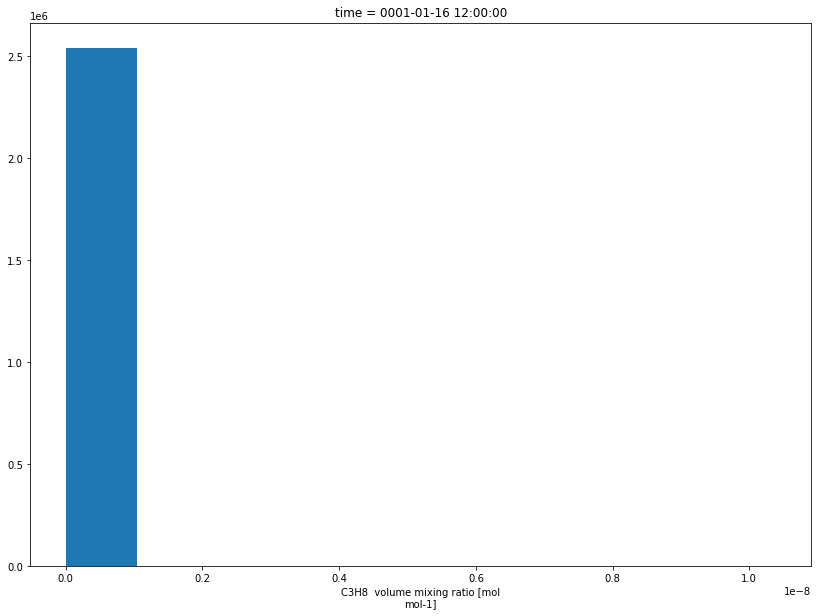

In [15]:
# import cftime
t = cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True)

ds.sel(time=t)['c3h8'].plot(figsize=(14,10));

In [23]:
dfsub[dfsub['experiment_id']=='esm-hist']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
4558,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Amon,sfcWind,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
4559,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Amon,rtmt,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
4560,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Amon,rsutcs,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
4561,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Amon,rsut,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
4562,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Amon,rsuscs,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/esm-...,NaN,20180701
...,...,...,...,...,...,...,...,...,...,...,...
454951,CMIP,CSIRO,ACCESS-ESM1-5,esm-hist,r6i1p1f1,Amon,vas,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/esm-...,NaN,20200730
454952,CMIP,CSIRO,ACCESS-ESM1-5,esm-hist,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/esm-...,NaN,20200730
454953,CMIP,CSIRO,ACCESS-ESM1-5,esm-hist,r6i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/esm-...,NaN,20200730
454954,CMIP,CSIRO,ACCESS-ESM1-5,esm-hist,r6i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/esm-...,NaN,20200730


In [24]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper(df.loc[454952, 'zstore'])

# make sure to specify that metadata is consolidated
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (lat: 145, bnds: 2, lon: 192, time: 1980)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(145, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(589, 145, 192), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  62092.0
    cmor_version:           3.4.0
    ...                     ...
    tracking_id:            hdl:21.14100/acf2a1f6-5a7a-4d77-a4cd-250bf16946f1
    variable_id:            tas
    variant_label:          r6i1p1f1
    version:                v20200730
    netcdf_tracking_ids:    hdl:21.14100/acf2a1f6-5a7a-4d77-a4cd-250bf16946f1
    version_id:             v20200730

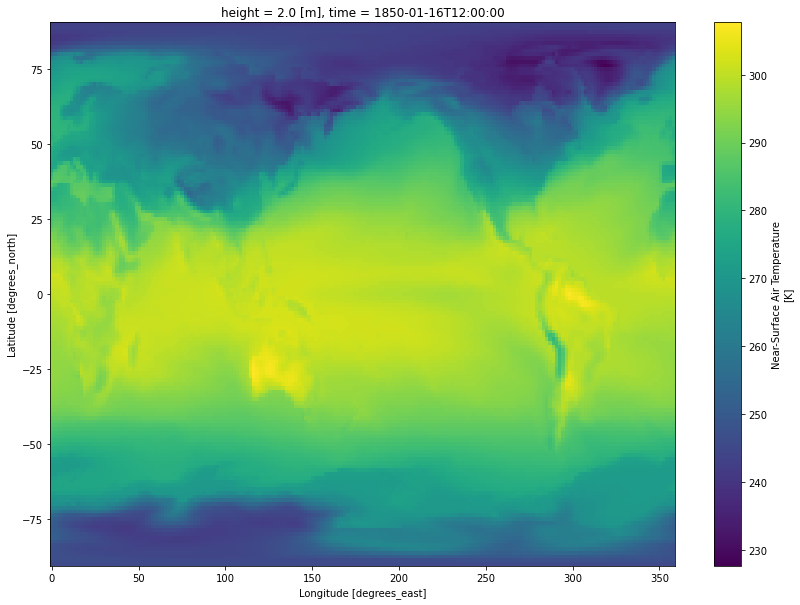

In [27]:
from datetime import datetime# as datetime
t = datetime(1850, 1, 16, 12, 0, 0, 0)#, has_year_zero=True)

ds.sel(time=t)['tas'].plot(figsize=(14,10));

In [53]:
dfsub[#(dfsub['experiment_id']=='ssp245') & 
     (dfsub['table_id']=='Amon') &
     (dfsub['institution_id'].isin(['NOAA-GFDL', 'NCAR'])) & 
     (dfsub['source_id']=='CESM2') & 
     (dfsub['member_id']=='r11i1p1f1') & 
     (dfsub['variable_id'].isin(['tas', 'tasmax', 'tasmin',
                                 'clr', 'hurs', 'huss', 'pr',]))]#[''].unique()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
198051,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon,hurs,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190514
198054,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon,huss,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190514
198057,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190514
198172,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190514
437199,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,huss,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528
437549,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,tasmax,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528
437550,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528
437555,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528
437687,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,hurs,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528
437792,ScenarioMIP,NCAR,CESM2,ssp126,r11i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp126...,NaN,20200528


In [54]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper(df.loc[437792, 'zstore'])

# make sure to specify that metadata is consolidated
ds = xr.open_zarr(mapper, consolidated=True)
ds


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1032)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(288, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1728
    ...                     ...
    tracking_id:            hdl:21.14100/b7d4e544-518d-4b38-84b5-4f48c432f3eb...
    variable_id:            pr
    variant_info:           CMIP6 SSP1-2.6 experiments (2015-2100) with CAM6,...
    variant_label:          r11i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/b7d4e544-518d-4b38-84b5-4f48c432f3eb...
    version_id:             v20200528

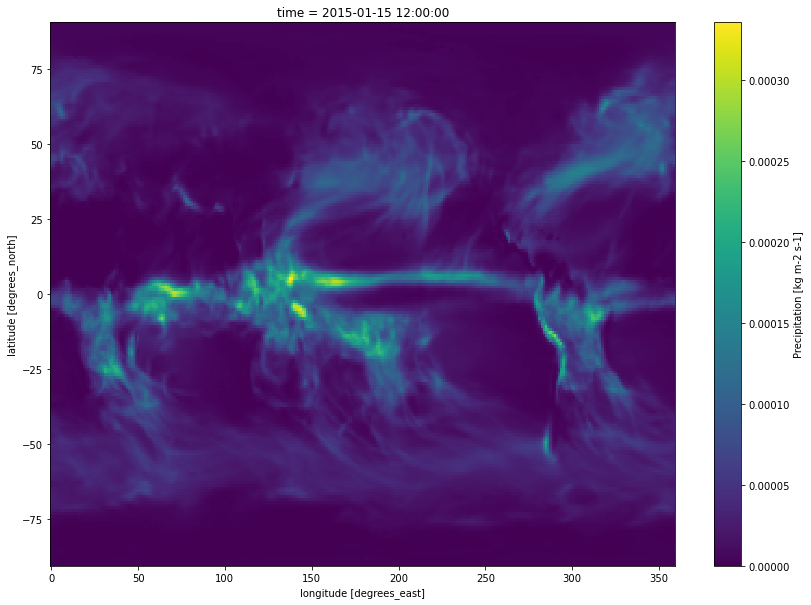

In [56]:
# import cftime
t = cftime.DatetimeNoLeap(2015, 1, 15, 12, 0, 0, 0, has_year_zero=True)

ds.sel(time=t)['pr'].plot(figsize=(14,10));